<a href="https://colab.research.google.com/github/GmBodhi/CindyJS/blob/master/Digit_Recongnition_Samkhya_Day3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Digit Recognition Using Machine Learning**

Here is a small example for recognizing digit. We call the model as Samkhya. There is no need to install any software. We use Colab Notebook With Google login, go to colab.research.google.com You can run the code below, block by block.


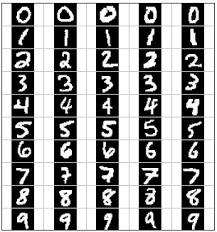

In [ ]:
from tensorflow.keras import datasets,layers,models,Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D
import matplotlib.pyplot as plt

In [ ]:
(TrainIn, TrainOut), (TestIn, TestOut) = datasets.mnist.load_data()
TrainIn = TrainIn.reshape(60000,28,28,1)
TestIn = TestIn.reshape(10000,28,28,1)
TrainOut = to_categorical(TrainOut)
TestOut = to_categorical(TestOut)


In [ ]:
Samkhya = Sequential()
#add Convolution  Layers
Samkhya.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(28,28,1),name='c1'))
Samkhya.add(MaxPooling2D(pool_size=(2, 2)))
Samkhya.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(28,28,1),name='c2'))
Samkhya.add(MaxPooling2D(pool_size=(2, 2)))


# Add Flatten/Dense Layers
Samkhya.add(Flatten(name='F1'))
Samkhya.add(Dense(10, activation='softmax',name='D1'))

Samkhya.compile(optimizer='sgd', loss='mse', metrics=['accuracy'])

In [ ]:
print(Samkhya.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
c1 (Conv2D)                  (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
c2 (Conv2D)                  (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
F1 (Flatten)                 (None, 1600)              0         
_________________________________________________________________
D1 (Dense)                   (None, 10)                16010     
Total params: 53,578
Trainable params: 53,578
Non-trainable params: 0
____________________________________________________

In [ ]:
TrainingLog=Samkhya.fit(TrainIn, TrainOut,epochs=10, validation_split=0.1)

# **Testing the Digit Recognition**

In [ ]:
import  PIL, google.colab  
from PIL import  ImageEnhance , ImageOps  
from tensorflow.keras.preprocessing.image import img_to_array

In [ ]:
Samkhya.evaluate(TestIn, TestOut)

In [ ]:

plt.imshow(TestIn[10].reshape(28, 28),cmap='gray')


In [ ]:
pred = Samkhya.predict(TestIn[10].reshape(1, 28, 28, 1))
print("The Samkhya predicted is",pred.argmax())

Let us try uploading handwrtitten digits from laptop/system

In [ ]:
# load the hand written image  from your Desktop/Laptop
google.colab.files.upload()


In [ ]:
aksharam = PIL.Image.open('nalu.png')
plt.imshow(aksharam)

In [ ]:
aksharam1 = ImageOps.grayscale(aksharam)  
plt.imshow(aksharam1,cmap='gray')
newsize = (28, 28) 
aksharam2=aksharam1.resize(newsize)
plt.imshow(aksharam2,cmap='gray')
aksharam2.size

In [ ]:
aksharam3= img_to_array(aksharam2)
aksharam3= aksharam3.reshape(1, 28, 28, 1)
predictions = Samkhya.predict(aksharam3)
print("The Samkhya predicted is",predictions.argmax())